In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("stats.tsv", sep="\t")

In [3]:
df['normalColumns'] = df['columns'] - df['reconColumns']
df['normalCells'] = df['normalColumns'] * df['rows']
df['reconCells'] = df['reconColumns'] * df['rows']
df['totalCells'] = df['rows'] * df['columns']
features = df[['normalCells','reconCells']]
sizes = df['size']
df

,name,size,rows,columns,reconColumns,normalColumns,normalCells,reconCells,totalCells
0,MRR editorial board,1344,4,4,0,4,16,0,16
1,MRR editorial board,2472,8,4,0,4,32,0,32
2,MRR editorial board,3688,12,4,0,4,48,0,48
3,MRR editorial board,4936,16,4,0,4,64,0,64
4,MRR editorial board,6168,20,4,0,4,80,0,80
...,...,...,...,...,...,...,...,...,...
115,institutionen gerit xlsx,3220688,1206,25,2,23,27738,2412,30150
116,institutionen gerit xlsx,3770480,1407,25,2,23,32361,2814,35175
117,institutionen gerit xlsx,4332296,1608,25,2,23,36984,3216,40200
118,institutionen gerit xlsx,4865888,1809,25,2,23,41607,3618,45225


In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(positive=True).fit(features, sizes)
[reg.coef_, reg.intercept_]

[array([ 77.79314911, 146.09356285]), -1244779.383709941]

In [5]:
reg.score(features, sizes)

0.9758613687039843

<AxesSubplot: xlabel='totalCells', ylabel='size'>

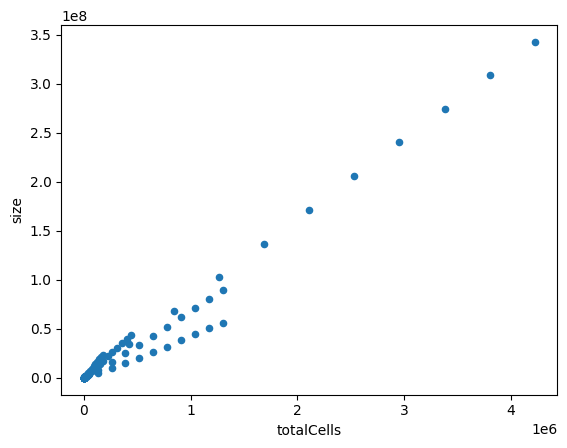

In [7]:
growth = df[['totalCells','size']] #.set_index('rows')
from matplotlib import pyplot as plt
growth.plot.scatter(x='totalCells',y='size')